In [1]:
%matplotlib notebook
from ipywidgets import interact_manual, Dropdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import re

In [2]:
%%bash
ls

NetworkTraffic.ipynb
README.md
network_data.log
network_monitor.py
ping_list.json
plots
runs
speed_file.log
speedtest_python.py


In [3]:
data = []
with open("./network_data.log", 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))
traffic = pd.DataFrame(data)

In [4]:
speed = []
with open("./speed_file.log", 'r') as f:
    for line in f.readlines():
        speed.append(json.loads(line))
speed_df = pd.DataFrame(speed)

In [5]:
speed_df.head(4).transpose()

,0,1,2,3
bytes_received,134893180,138917500,139234940,143029648
bytes_sent,10780672,8511488,11083776,8126464
cc,US,US,US,US
country,United States,United States,United States,United States
d,7.87664,7.87664,7.87664,11.5728
download,7.64702e+07,1.06609e+08,1.08268e+08,1.12616e+08
host,speedtest-pa.singnet.com.sg:8080,speedtest-pa.singnet.com.sg:8080,speedtest-pa.singnet.com.sg:8080,sp5.mimosa.co:8080
id,2761,2761,2761,14938
lat,37.4419,37.4419,37.4419,37.3541
latency,19.008,19.139,18.603,21.028


In [27]:
speed_df['megabytes_received'] = speed_df['bytes_received'] / 10**6
speed_df['upload_mbps'] = speed_df['upload'] / 10**6
speed_df['download_mbps'] = speed_df['download']/10**6 

In [7]:
traffic.sample(10)

,date_string,datetime,error_text,error_type,errors,ok,resp_code,resp_length,resp_time,resp_times,unixtime,url,uuid
5378,None,2017-12-01 10:56:22.644960,no_error,no_error,None,1,200,158319,2.252761,None,1512125782,http://www.microsoft.com,3cfe5100-d686-11e7-8d68-9801a7aa585d
11103,None,2017-12-01 14:53:16.152321,no_error,no_error,None,1,200,11048,1.171352,None,1512139996,http://www.google.com,5ab2ac66-d6a7-11e7-8e99-9801a7aa585d
3800,None,2017-12-01 09:52:10.230134,no_error,no_error,None,1,200,11056,1.115106,None,1512121930,http://www.google.com,4c95e942-d67d-11e7-8e48-9801a7aa585d
11616,None,2017-12-01 15:14:02.195495,no_error,no_error,None,1,200,157960,2.252528,None,1512141242,http://www.microsoft.com,3d36a13a-d6aa-11e7-9294-9801a7aa585d
11817,None,2017-12-01 15:22:12.244124,no_error,no_error,None,1,200,158160,2.297382,None,1512141732,http://www.microsoft.com,624ea39a-d6ab-11e7-95e2-9801a7aa585d
10744,None,2017-12-01 14:38:09.579609,no_error,no_error,None,1,200,11070,1.107749,None,1512139089,http://www.google.com,3d855ac8-d6a5-11e7-8157-9801a7aa585d
11717,None,2017-12-01 15:18:05.449067,no_error,no_error,None,1,200,158017,2.256147,None,1512141485,http://www.microsoft.com,cf2fd2a8-d6aa-11e7-8d3b-9801a7aa585d
2546,None,2017-12-01 09:00:37.761951,no_error,no_error,None,1,200,384378,1.221178,None,1512118837,http://www.facebook.com,17ed681e-d676-11e7-9d49-9801a7aa585d
5660,None,2017-12-01 11:08:30.647681,no_error,no_error,None,1,200,11118,1.111138,None,1512126510,http://www.google.com,f6ba22f8-d687-11e7-8c29-9801a7aa585d
7596,None,2017-12-01 12:27:30.699475,no_error,no_error,None,1,200,158013,2.246865,None,1512131250,http://www.microsoft.com,fd687680-d692-11e7-a315-9801a7aa585d


In [8]:
traffic.shape

(13880, 13)

In [9]:
traffic.groupby(['url']).count()

,date_string,datetime,error_text,error_type,errors,ok,resp_code,resp_length,resp_time,resp_times,unixtime,uuid
url,,,,,,,,,,,,
http://www.apple.com,0,3470,3470,3470,0,3470,3470,3470,3470,0,3470,3470
http://www.facebook.com,0,3470,3470,3470,0,3470,3470,3470,3470,0,3470,3470
http://www.google.com,0,3470,3470,3470,0,3470,3470,3470,3470,0,3470,3470
http://www.microsoft.com,0,3470,3470,3470,0,3470,3470,3470,3470,0,3470,3470


In [17]:
url_picker = Dropdown(
    options=['all']+list(traffic.url.unique()),
    value=(['all']+list(traffic.url.unique()))[0],
    description='URL',
    disabled=False,
)

def draw_traffic(url):
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    if url == 'all':
        plt.title('All traffic')
        traffic.plot(x='unixtime', y='resp_time', ax=ax[0], kind='scatter')
        sns.distplot(traffic['resp_time'], ax=ax[1])
    else:
        plt.title(traffic[traffic['url']==url]['url'].unique()[0])
        traffic[traffic['url']==url].plot(x='unixtime', y='resp_time', ax=ax[0], kind='scatter')
        sns.distplot(traffic[traffic['url']==url]['resp_time'], ax=ax[1])
        
    matches = re.match("https?:\/\/(www)?\.(.+)\.(.+)",url)
    if url == 'all':
        fig.savefig('./plots/all_traffic.png')
    else:
        fig.savefig('./plots/{}_traffic.png'.format(matches.group(1)))
    plt.tight_layout()
interact_manual(draw_traffic, url=url_picker);#

interactive(children=(Dropdown(description='URL', options=('all', 'http://www.google.com', 'http://www.facebook.com', 'http://www.apple.com', 'http://www.microsoft.com'), value='all'), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

In [12]:
traffic['response_code'].unique()

array([200])

<IPython.core.display.Javascript object>


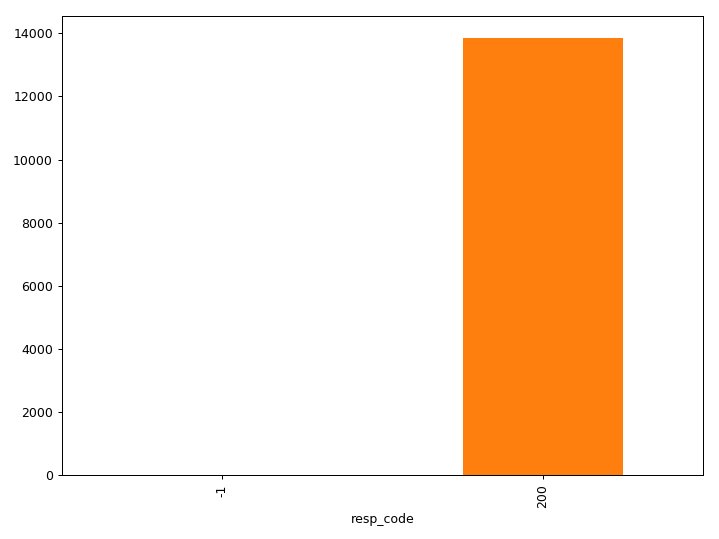

In [21]:
try:
    fig, ax = plt.subplots(figsize=(8,6))
    plt_data.groupby(['resp_code']).count()['unixtime'].plot(kind='bar', ax=ax)
    plt.tight_layout()
    fig.savefig('./plots/error_dist.png')
except:
    print("error")

In [22]:
speed_df.keys()

Index(['bytes_received', 'bytes_sent', 'cc', 'country', 'd', 'download',
       'host', 'id', 'lat', 'latency', 'lon', 'name', 'ping', 'share',
       'sponsor', 'timestamp', 'upload', 'url', 'url2', 'megabytes_received',
       'upload_mbps', 'download_mbps'],
      dtype='object')

<IPython.core.display.Javascript object>


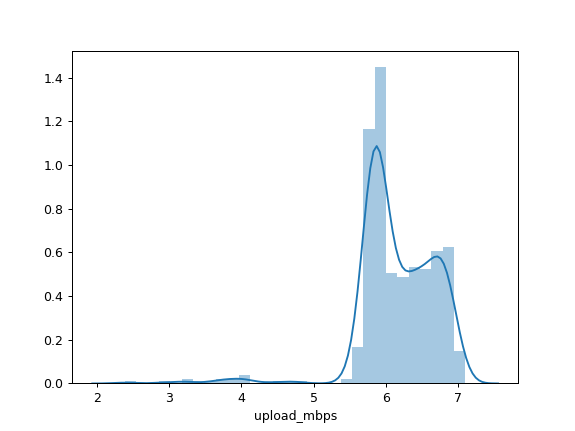

In [23]:
plt.figure()
sns.distplot(speed_df['upload_mbps'])

<IPython.core.display.Javascript object>


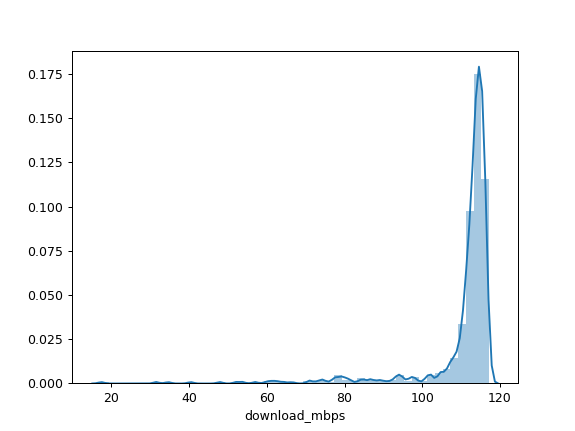

In [28]:
plt.figure()
sns.distplot(speed_df['download_mbps'])